Question 1

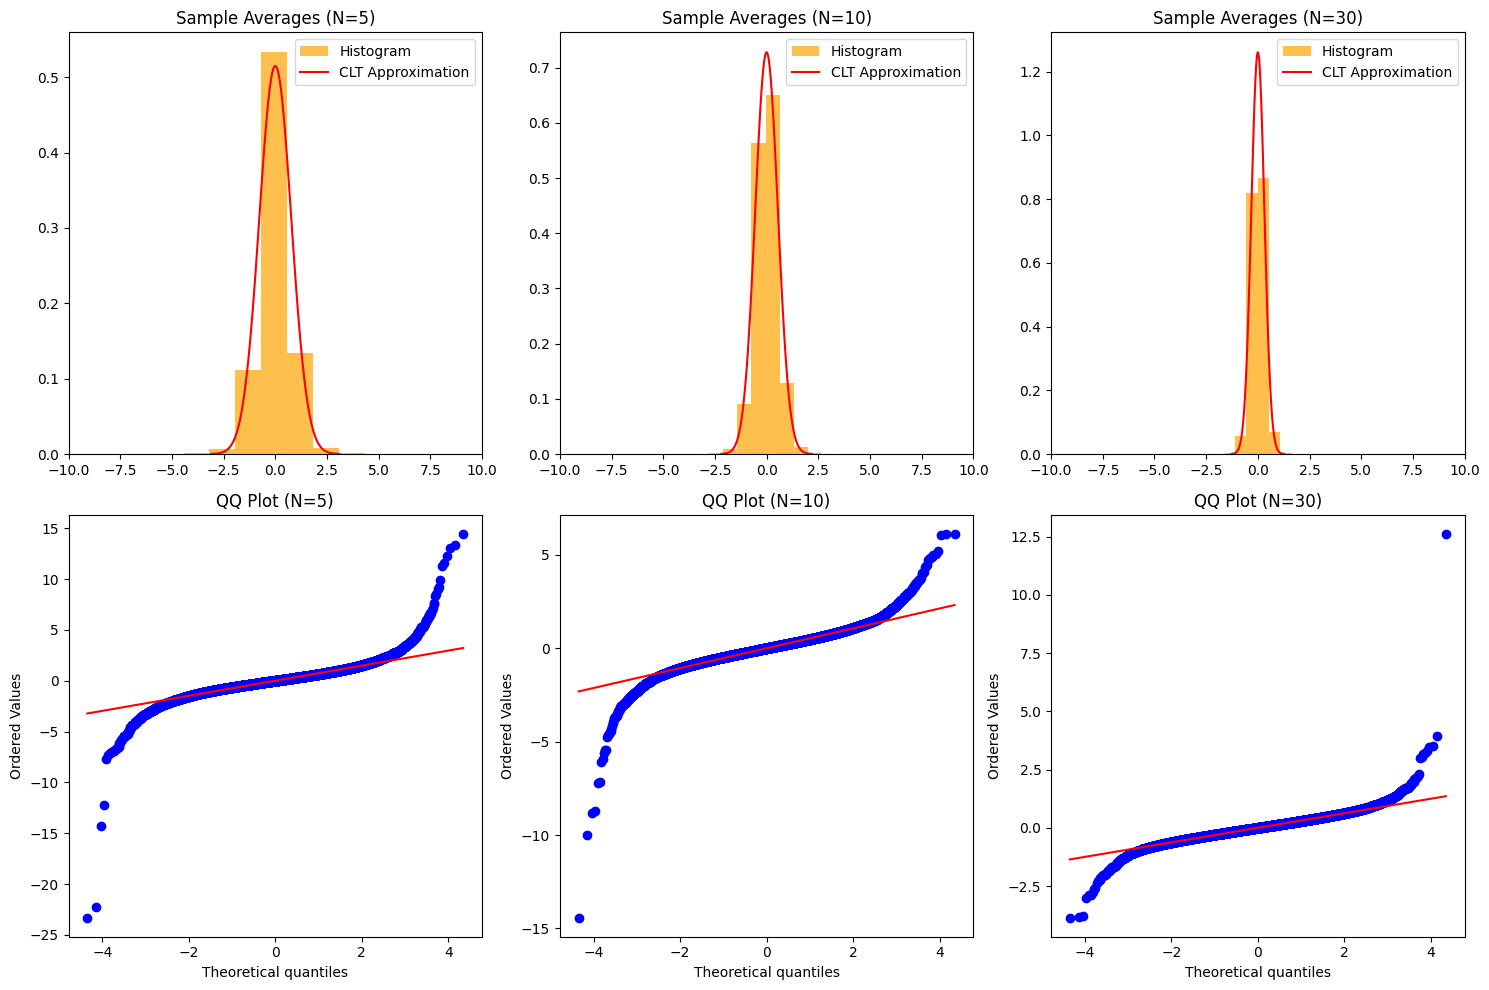

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, probplot

#a) Create a 2-by-3 array of subplots. Fix k = 3 and instantiate an array N = [5, 10, 30] and a variable size = 100, 000.
k = 3
N_values = [5, 10, 30]
sample_size = 100000

#Function for generating sample averages and plotting histograms
def generate_plot_samples(k, N_values, size):
    plt.figure(figsize=(15, 10))

    for i, N in enumerate(N_values, start=1):
        #b) Using a for loop, for each value n in N sample a size × n array of samples from the distribution t(k)
        samples = t.rvs(k, size=(size, N))

        #c) Compute the sample average along each row and plot their histogram in a subplot
        sample_means = np.mean(samples, axis=1)

        #d) Over the histogram, plot the approximate density of the distribution of sample averages which is given by the CLT as described above.
        plt.subplot(2, 3, i)
        plt.hist(sample_means, bins=30, density=True, alpha=0.7, label='Histogram', color='orange')

        #Plotting the approx. density using CLT
        clt_mean = 0
        clt_var = k / ((k - 2) * N)
        clt_std = np.sqrt(clt_var)
        x = np.linspace(clt_mean - 4 * clt_std, clt_mean + 4 * clt_std, 100)
        plt.xlim(-10,10)
        plt.plot(x, norm.pdf(x, loc=clt_mean, scale=clt_std), 'r-', label='CLT Approximation')


        plt.title(f'Sample Averages (N={N})')
        plt.legend()

        #e) Display the QQ plot of the sample means versus their approximate distribution
        plt.subplot(2, 3, i + 3)
        probplot(sample_means, plot=plt)
        plt.title(f'QQ Plot (N={N})')

    plt.tight_layout()
    plt.show()



#Calling the function here
generate_plot_samples(k, N_values, sample_size)


Question 1:
Here, we created a 2 by 3 array of subplots, fixing k=3 and instantiatinng values of N=[5,10,30] and size=100000.This is done using a for loop to iterate over values different values of N
Inside the loop for each N, it samples a size x N array of samples from the student's t-distribution
Then it computes the sample average along each row resulting in size sample averagges. Then it plots the histogram of these sammple averages in a subplot
Over each histogram it plots the approximate density of the distribution of sample averages given by the CLT. We do this here using using the mean and variance based on the CLT formula and plotting the normal distribution
Then in a separate subplot, we display the QQ plot of the sample means vs their approximate distribution

As for the quesiton about which value of N is a good approximation, this depends on how well the distribution of sample means aligns with the normal distribution approximation which is provided by the CLT. Generally as N increases, the sample means tend to follow a normal distribution more closely according to the CLT.
The QQ plot can be helpful in visually assessing how well the sample means match the expected normal distribution.
A good approximation would be when the points in the QQ plots are close to a straight line

Question 2

In [3]:
import pandas_datareader.data as web
data = web.DataReader('^DJI', 'stooq', start='1996-01-01', end='2023-11-14')
data = data.reset_index()
dates = data["Date"]
dow = data["Close"].to_numpy()

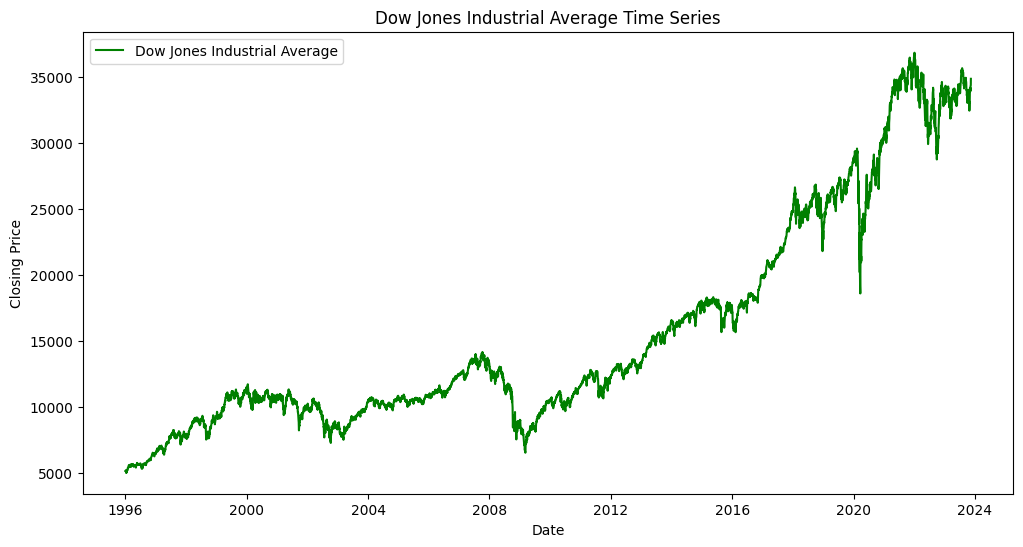

In [4]:
from scipy.optimize import minimize
import seaborn as sns

#a) Plotting the time series
plt.figure(figsize=(12,6))
plt.plot(dates, dow, label='Dow Jones Industrial Average', color='green')
plt.title('Dow Jones Industrial Average Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

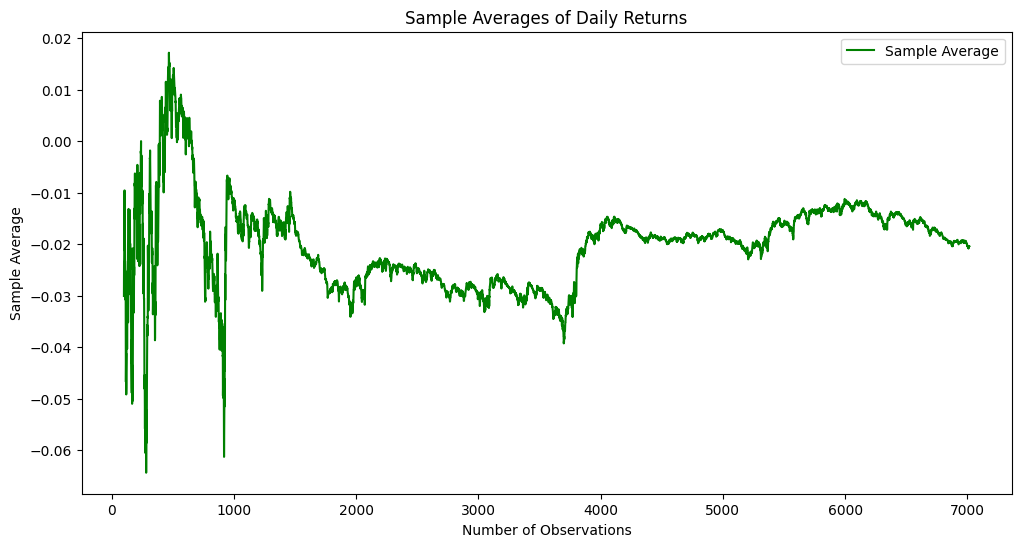

In [5]:
#b) Computing the time series of (percentage) daily returns using the formula
returns = 100 * (dow[1:] / dow[:-1] - 1)

#c) Computing the sample averages of daily returns
n_values = np.arange(100, len(returns) + 1)
sample_averages = [np.mean(returns[:n]) for n in n_values]

#Plotting the sample averages
plt.figure(figsize =(12,6))
plt.plot(n_values, sample_averages, label='Sample Average', color='green')
plt.title('Sample Averages of Daily Returns')
plt.xlabel('Number of Observations')
plt.ylabel('Sample Average')
plt.legend()
plt.show()

Here, we calculate the sample averages of daily returns and plot them against the number of observations. We started by computing a time series of percentage daily returns using the formula and then we computed the sample averages of daily returns for increasing sample sizes ranging from 100 to the total no. of observations
To determine whether it obeys the weak law of large numbers(LLN) we need to consider the characteristics of LLN:
The weak law of large numbers is satisfied when more observations are included in the sample average, it should approach the expected value of the population
Looking at the plot here, it is evident that the sample averages tend to stabilize as the no. of observations increases.


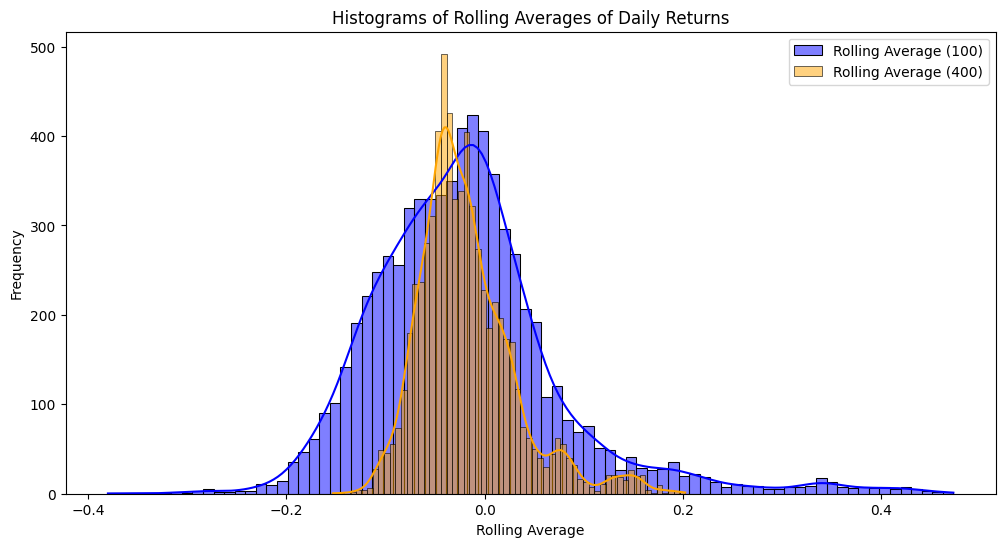

In [6]:
#Function to calculate rolling averages
def rolling_average(arr, window):
    rolling_averages = []
    for i in range(len(arr) - window + 1):
        average = np.mean(arr[i:i+window])
        rolling_averages.append(average)
    return np.array(rolling_averages)


#d) Computing rolling averages of daily returns and plotting histograms
len_100_rolling = rolling_average(returns, window=100)
len_400_rolling = rolling_average(returns, window=400)

#Plotting histogram
plt.figure(figsize=(12,6))
sns.histplot(len_100_rolling, kde=True, color='blue', label='Rolling Average (100)')
sns.histplot(len_400_rolling, kde=True, color='orange', label='Rolling Average (400)')
plt.title('Histograms of Rolling Averages of Daily Returns')
plt.xlabel('Rolling Average')
plt.ylabel('Frequency')
plt.legend()
plt.show()




Here, both histograms exhibit a bell shaped pattern with their peaks being centrally located, resembling the typical shape of a normal distribution. The histograms for different window sizes(100 and 400) display similar shapes. As the window size increases, the distribution of rolling averages remains consistent, aligning with the expectations of the CLT. The tails do not show any deviations from a normal distribution(no heavy tails or outliers)
So based on the above characteristics, we can conclude that the histograms of rolling averages of daiily returns obey the Central Limit THeorem. The consistent bell shaped patterns, symmetry and stability across varying window sizes indicate a distribution converging to normality in accordance with the CLT

In [7]:
from scipy.stats import skew, kurtosis
#e) Computing sample mean, variance, skewness and kurtosis
mean_returns = np.mean(returns)
var_returns = np.var(returns)
skewness_returns = skew(returns)
kurtosis_returns = kurtosis(returns)

print(f'Sample Mean of Daily Returns:{mean_returns}')
print(f'Sample Variance of Daily Returns: {var_returns}')
print(f'Skewness of Daily Returns: {skewness_returns}')
print(f'Kurtosis of Daily Returns: {kurtosis_returns}')


Sample Mean of Daily Returns:-0.020366613915872554
Sample Variance of Daily Returns: 1.3646137341557445
Skewness of Daily Returns: 0.6369368021000077
Kurtosis of Daily Returns: 12.662292417154363


Here, Sample Mean of daily returns is -0.020366613915872554.
Sample Variance of daily returns is 1.3646137341557445.
Skewness of daily returns is 0.6369368021000077 indicatinng a moderate rightward skewness
Kurtosis of daily returns is 12.662292417154363 which suggests that there are heavy tails and a pronounced peak compared to a normal distribution
Given these statistics, A suitable family of distributions to consider for modeling such data is the t-distribution. Due to its robustness to outliers, flexibility in tail behaviour with degrees of freedom and ability to capture skewness and heavy tails makes it well suited for the uncertainties and characteristics of financial data

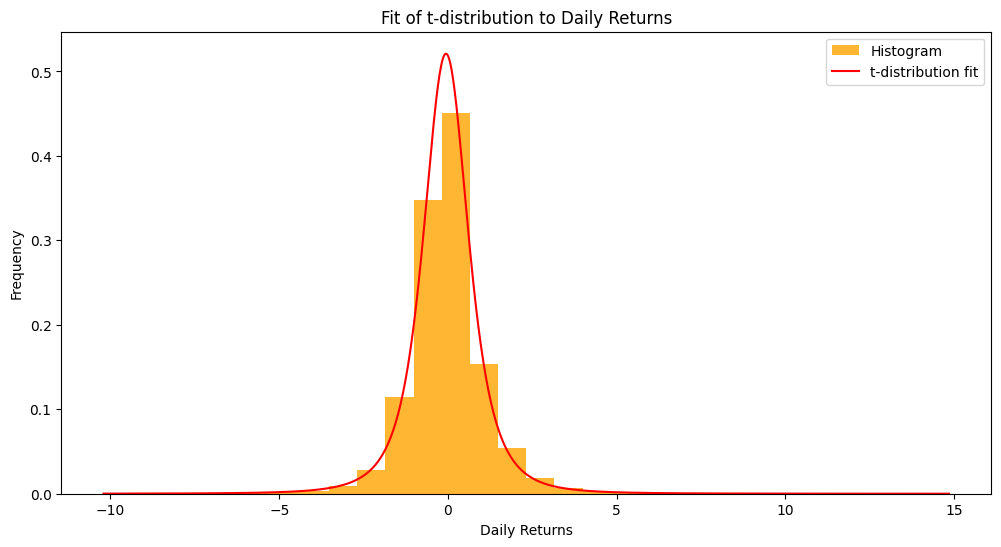

In [8]:
from scipy.optimize import minimize
#f)
#Defining the log-likelihoood function for the t-distribution
def log_likelihood(parameters, data):
    df, loc, scale=parameters
    log_likelihood_values = t.logpdf(data, df, loc=loc, scale=scale)
    return -np.sum(log_likelihood_values)

#Initial parameter values for optimization
initial_parameters = [1,0,1] #guess

#Minimiza function to find optimal parameters
optimal_parameters = minimize(log_likelihood, initial_parameters, args=(returns,)).x

#Extracting optimal parameters
df_optimal, loc_optimal, scale_optimal = optimal_parameters

#Plotting the PDF of optimal distribution againnst the histogram
plt.figure(figsize=(12,6))

plt.hist(returns, bins=30, density=True, alpha=0.8, label='Histogram', color='orange')

x=np.linspace(min(returns), max(returns), 1000)


#x values for PDF plot
plt.plot(x, t.pdf(x, df_optimal, loc=loc_optimal, scale=scale_optimal), 'r-', label='t-distribution fit')
plt.title('Fit of t-distribution to Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


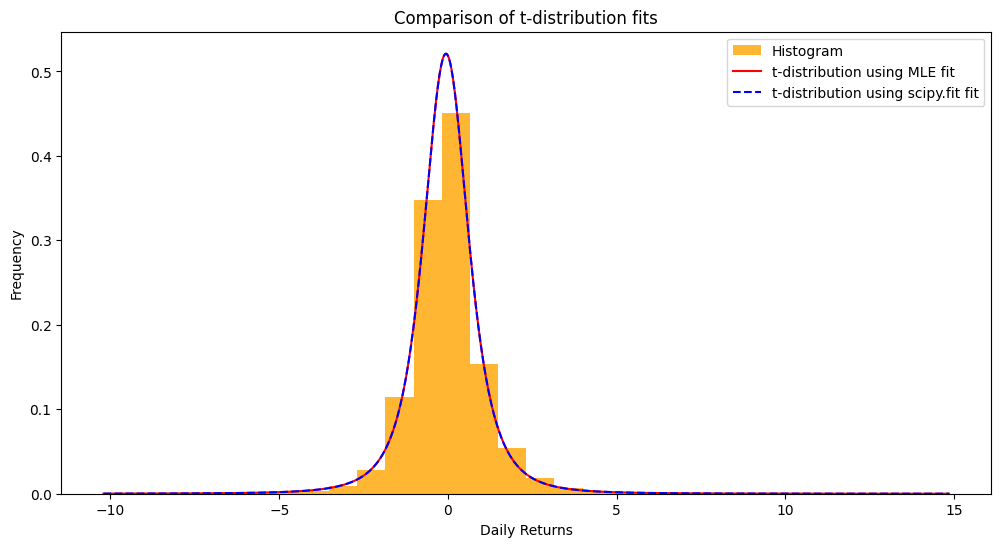

In [9]:
#g)
from scipy.stats import fit
#fit the t-distribution using scipy's fit function
fit_parameters = t.fit(returns)
#Extracting parameters
df_fit, loc_fit, scale_fit = fit_parameters

#Plotting the PDF of distribution against the histogram
plt.figure(figsize=(12,6))
plt.hist(returns, bins=30, density=True, alpha=0.8, label='Histogram', color='orange')
x = np.linspace(min(returns), max(returns), 1000)

#Plotting the t-distribution fit using MLE
plt.plot(x, t.pdf(x, df_optimal, loc=loc_optimal, scale=scale_optimal), 'r-', label='t-distribution using MLE fit')

#Plotting the t-distribution fit using scipy's fit function

plt.plot(x, t.pdf(x, df_fit, loc=loc_fit, scale=scale_fit), 'b--', label='t-distribution using scipy.fit fit')
plt.title('Comparison of t-distribution fits')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Here, we utilized the t-distribution to model the daily returns of the Dow Jones Industrial average. The objective was to estimate the distribution's parameters throught two methods: the Maximum Likelihood Estimator(MLE) and scipy's fit function
For MLE: This involved defining a log-likelihood function for the t-distribution using the minimize function from scipy to find the optimal parameters. The obtained parameters(degrees of freedom, location and scale) were used to plot the PDF against the histogram of daily returns
For Scipy's fit function: The fit function was used to fit the t-distribution to the daily returns providing an alternative set of parameters. The parameters from scipy's fit function were then used to plot another PDF against the same histogram